***
**Introduction to Machine Learning** <br>
__[https://slds-lmu.github.io/i2ml/](https://slds-lmu.github.io/i2ml/)__
***

# Exercise sheet 5: Evaluation 1

## Exercise 1: Evaluating regression learners

Imagine you work for a data science start-up and sell turn-key statistical models. Based on a set of training
data, you develop a regression model to predict a customer’s legal expenses from the average monthly number of
indictments brought against their firm.

> a) Due to the financial sensitivity of the situation, you opt for a very flexible learner that fits the customer’s data
($n_{train} = 50$ observations) well, and end up with a degree-21 polynomial (blue, solid). Your colleague is skeptical
and argues for a much simpler linear learner (gray, dashed). Which of the models will have a lower empirical
risk if standard $L2$ loss is used?

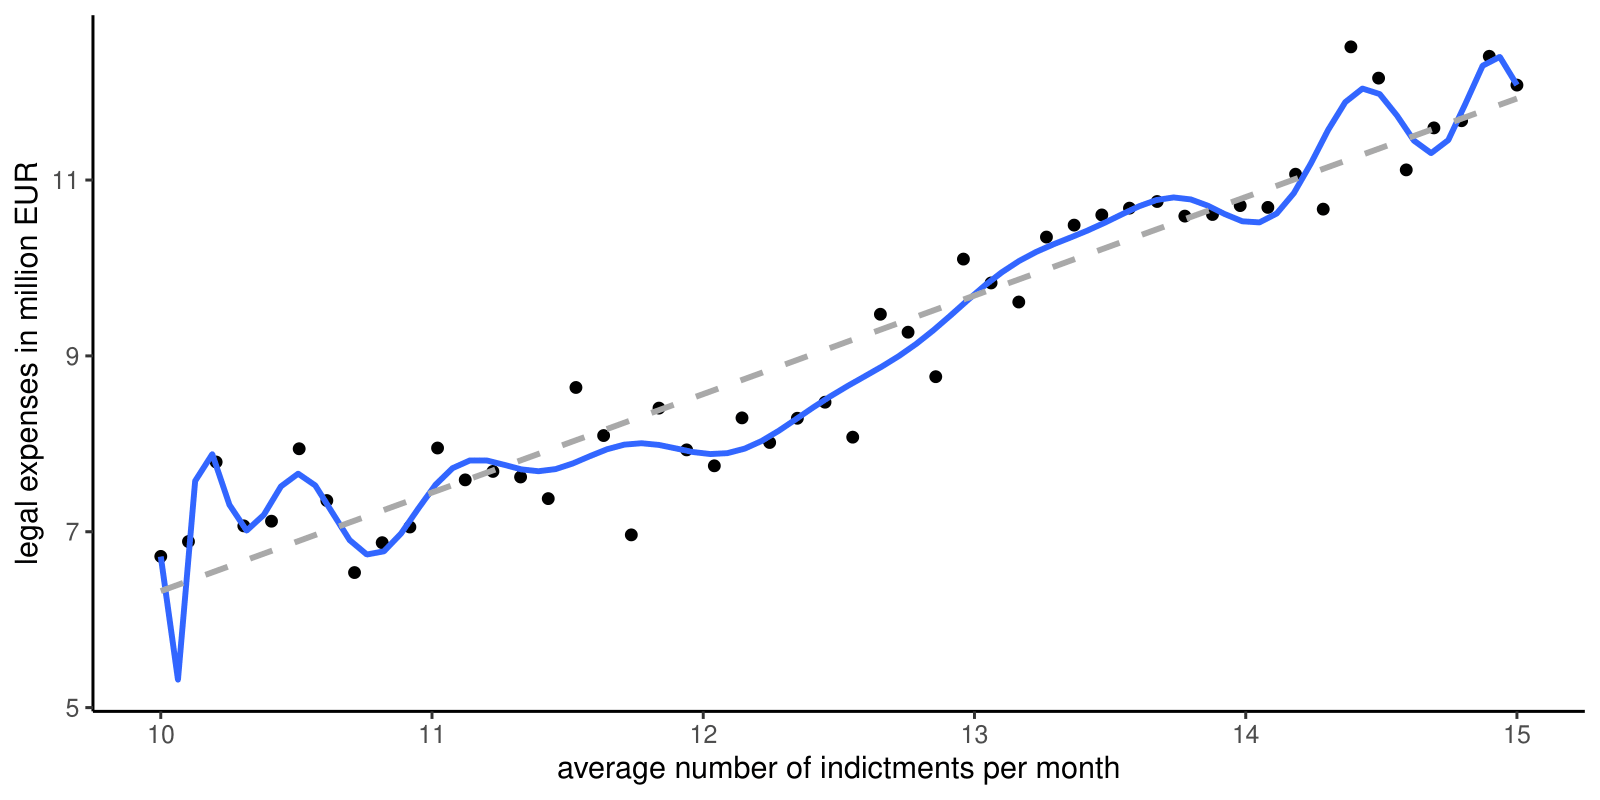


> **\# Entering your answer here:**

> b) Why might evaluation based on training error not be a good idea here?

> **\# Entering your answer here:**

> c) Evaluate both learners on the following test data ($n_{test} = 10$), using
>> (i) mean squared error (MSE), and <br>
>> (ii) mean absolute error (MAE). <br>

> State your performance assessment and explain potential differences.

<div class="alert alert-block alert-info">
    <b>Hint:</b> use <code>R</code> or <code>Python</code> if you don’t feel like computing a degree-21 polynomial regression by hand.<br>
</div>

In [ ]:
# R code
set.seed(123)
x_train <- seq(10, 15, length.out = 50)
y_train <- 10 + 3 * sin(0.15 * pi * x_train) + rnorm(length(x_train), sd = 0.5)
data_train <- data.frame(x = x_train, y = y_train)
set.seed(321)
x_test <- seq(10, 15, length.out = 10)
y_test <- 10 + 3 * sin(0.15 * pi * x_test) + rnorm(length(x_test), sd = 0.5)
data_test <- data.frame(x = x_test, y = y_test)

In [ ]:
# Python code
import numpy as np
import pandas as pd
import math
np.random.seed(43)
x_train = np.linspace(10, 15, num = 50)
y_train = 10 + 3 * np.sin(0.15 * math.pi * x_train) + \
np.random.normal(loc=0.0, scale=0.5, size= len(x_train))
data_train = pd.DataFrame({"y": y_train, "x": x_train})
np.random.seed(2238)
x_test = np.linspace(10, 15, num = 50)
y_test = 10 + 3 * np.sin(0.15 * math.pi * x_test) + \
np.random.normal(loc=0.0, scale=0.5, size= len(x_test))
data_test = pd.DataFrame({"y": y_test, "x": x_test})

In [ ]:
# Entering your code here:

## Exercise 2: Importance of train-test split

We consider the `BostonHousing` data for which we would like to predict the nitric oxides concentration (`nox`) from
the distance to a number of firms (`dis`).

In [ ]:
# R code
library(mlbench)
data(BostonHousing)
data_pollution <- data.frame(dis = BostonHousing$dis, nox = BostonHousing$nox)
data_pollution <- data_pollution[order(data_pollution$dis), ]
head(data_pollution)

## dis nox
## 373 1.1296 0.668
## 375 1.1370 0.668
## 372 1.1691 0.631
## 374 1.1742 0.668
## 407 1.1781 0.659
## 371 1.2024 0.631

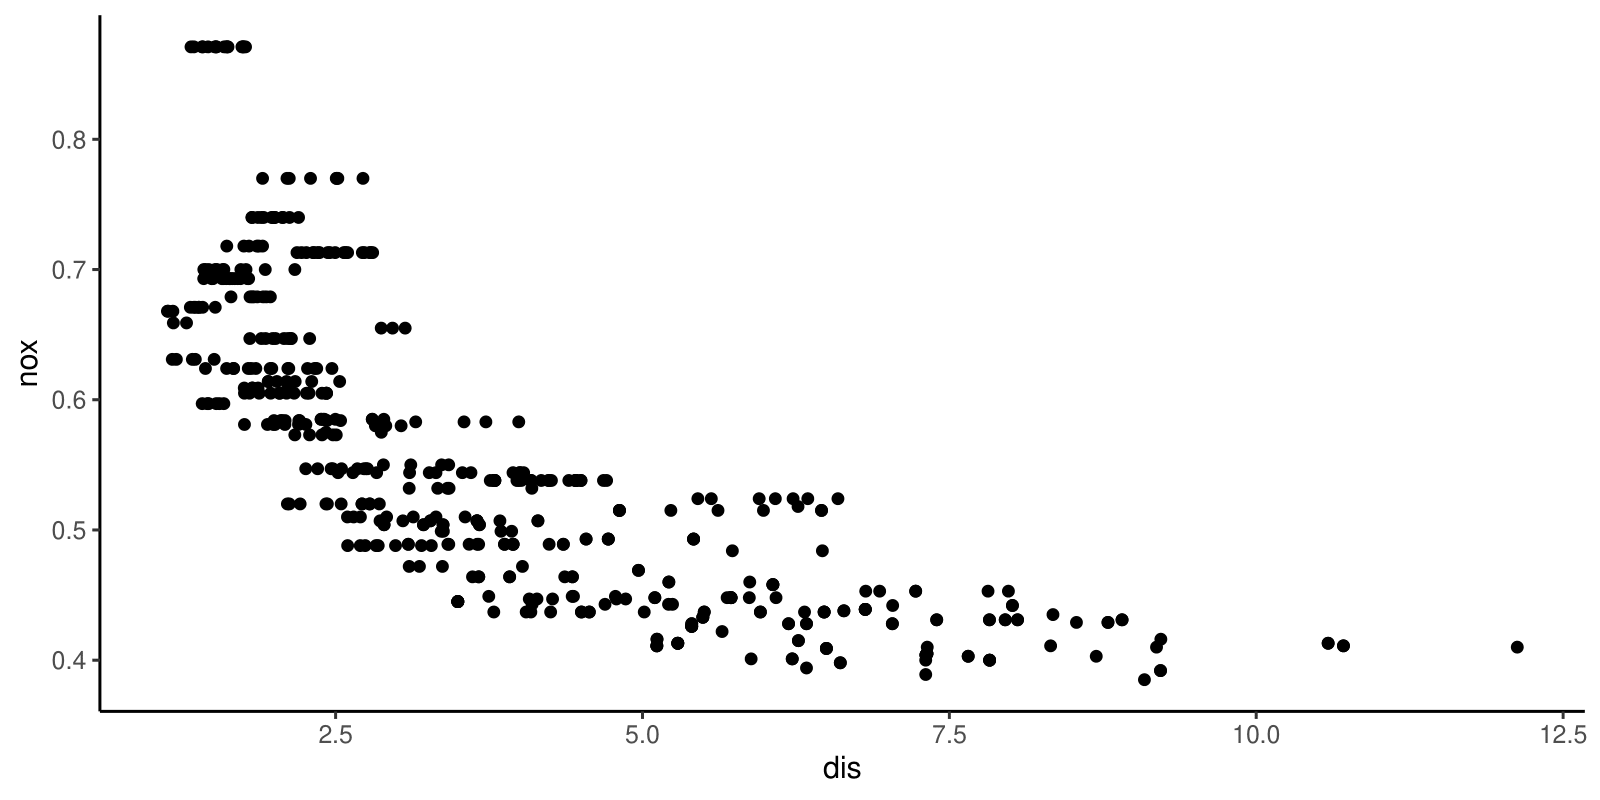

In [ ]:
# Python code
import numpy as np
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston = pd.DataFrame(data[:,np.r_[4,7]], columns= ["NOX", "DIS"])
boston = boston.sort_values("DIS")
boston.reset_index(drop = True, inplace = True)

> a) Use the first ten observations as training data to compute a linear model and evaluate the performance of your
learner on the remaining data using MSE.

In [ ]:
# Entering your code here:

> b) What might be disadvantageous about the train-test split in a)?

> **\# Entering your answer here:**

> c) Now, sample your training observations from the data set at random. Use a share of $0.1$ through $0.9$, in $0.1$
steps, of observations for training and repeat this procedure ten times. Afterwards, plot the resulting test errors
(in terms of MSE) in a suitable manner.

<div class="alert alert-block alert-info">
    <b>R Hint:</b> <code>rsmp</code> is a convenient function for splitting data – you will want to choose the ”holdout” strategy. Afterwards, resample can be used to repeatedly fit the learner.<br>
        <b>Python Hint:</b> <code>from sklearn.model selection import train test split</code> is a convenient function for splitting data. It has an optional parameter random state, which can be used to split the data randomly in each iteration.<br>
</div>

In [ ]:
# Entering your code here:

> d)  Interpret the findings from c).

> **\# Entering your answer here:**